In [22]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.gridspec as gridspec

from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
import os
import glob
import shutil

import tempfile

(396, 312, 3)
(1, 396, 312, 3)


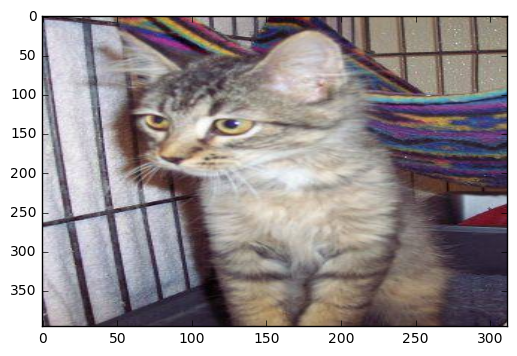

In [14]:
img = load_img("data/train/cat/cat.2.jpg")
x = img_to_array(img)

plt.imshow(img, aspect='auto')
print(x.shape)
x = np.expand_dims(x, axis=0)
print(x.shape)


In [27]:
# http://aidiary.hatenablog.com/entry/20161212/1481549365
def draw_images(datagen, x, result_images):
    # 出力先ディレクトリを作成
    temp_dir = tempfile.mkdtemp()

    # generatorから9個の画像を生成
    # xは1サンプルのみなのでbatch_sizeは1で固定
    g = datagen.flow(x, batch_size=1, save_to_dir=temp_dir, save_prefix='img', save_format='jpg')
    for i in range(9):
        batch = g.next()

    # 生成した画像を3x3で描画
    images = glob.glob(os.path.join(temp_dir, "*.jpg"))
    fig = plt.figure()
    gs = gridspec.GridSpec(3, 3)
    gs.update(wspace=0.1, hspace=0.1)
    for i in range(9):
        img = load_img(images[i])
        plt.subplot(gs[i])
        plt.imshow(img, aspect='auto')
        plt.axis("off")
    plt.savefig(result_images)

    # 出力先ディレクトリを削除
    shutil.rmtree(temp_dir)

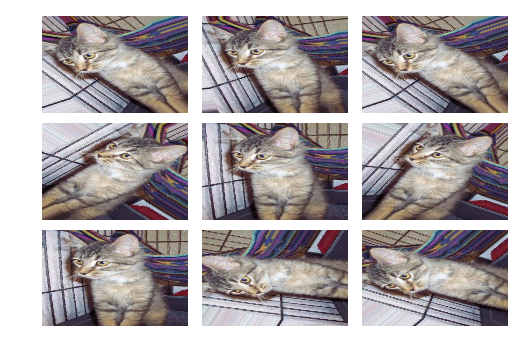

In [31]:
datagen = ImageDataGenerator(rotation_range=90)
draw_images(datagen, x, "result_rotation.jpg")


Found 4 images belonging to 2 classes.
['/tmp/tmpwvis118p/img_2_3841.jpg', '/tmp/tmpwvis118p/img_3_3936.jpg', '/tmp/tmpwvis118p/img_3_3429.jpg', '/tmp/tmpwvis118p/img_2_1725.jpg', '/tmp/tmpwvis118p/img_1_4278.jpg', '/tmp/tmpwvis118p/img_1_3292.jpg', '/tmp/tmpwvis118p/img_0_9243.jpg', '/tmp/tmpwvis118p/img_0_4125.jpg', '/tmp/tmpwvis118p/img_0_4487.jpg']


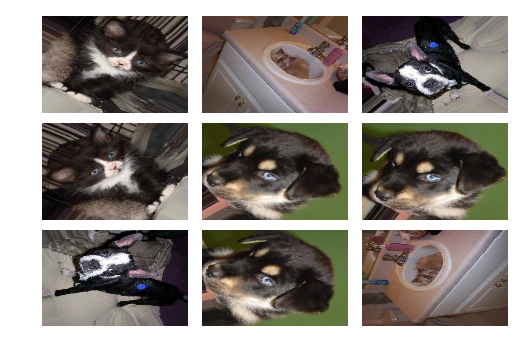

In [45]:
temp_dir = tempfile.mkdtemp()

gen = ImageDataGenerator(rotation_range=90)
batches = gen.flow_from_directory('data/sample2/', target_size=(224,224), 
            class_mode='categorical', shuffle=True, batch_size=1,
             save_to_dir=temp_dir, save_prefix='img', save_format='jpg')

for i in range(9):
    batch = batches.next()

# 生成した画像を3x3で描画
images = glob.glob(os.path.join(temp_dir, "*.jpg"))
print(images)
fig = plt.figure()
gs = gridspec.GridSpec(3, 3)
gs.update(wspace=0.1, hspace=0.1)
for i in range(9):
    img = load_img(images[i])
    plt.subplot(gs[i])
    plt.imshow(img, aspect='auto')
    plt.axis("off")
plt.savefig("result_rotation.jpg")

    
shutil.rmtree(temp_dir)